In [1]:
# installing libraries
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt


Number of momentum modes: 35
Momentum modes:
0 [ 1. -4.  0.]
1 [ 2. -4.  0.]
2 [ 3. -4.  0.]
3 [ 1. -3.  0.]
4 [ 2. -3.  0.]
5 [ 3. -3.  0.]
6 [ 4. -3.  0.]
7 [ 1. -2.  0.]
8 [ 2. -2.  0.]
9 [ 3. -2.  0.]
10 [ 4. -2.  0.]
11 [ 1. -1.  0.]
12 [ 2. -1.  0.]
13 [ 3. -1.  0.]
14 [ 4. -1.  0.]
15 [1. 0. 0.]
16 [2. 0. 0.]
17 [3. 0. 0.]
18 [4. 0. 0.]
19 [5. 0. 0.]
20 [1. 1. 0.]
21 [2. 1. 0.]
22 [3. 1. 0.]
23 [4. 1. 0.]
24 [1. 2. 0.]
25 [2. 2. 0.]
26 [3. 2. 0.]
27 [4. 2. 0.]
28 [1. 3. 0.]
29 [2. 3. 0.]
30 [3. 3. 0.]
31 [4. 3. 0.]
32 [1. 4. 0.]
33 [2. 4. 0.]
34 [3. 4. 0.]


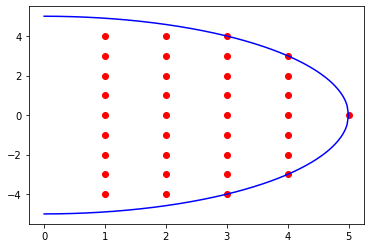

In [5]:
# making a momentum grid
dp = 1.0
pmax = 5
pmin = -pmax
np1 = round((pmax-pmin)/dp) + 1

ps_grid = np.zeros((np1**2,3))
pxs, pys = np.meshgrid(np.linspace(pmin,pmax,np1), np.linspace(pmin,pmax,np1))
ps_grid[:,0] = pxs.reshape(np1**2)
ps_grid[:,1] = pys.reshape(np1**2)
ps_grid[:,2] = np.zeros(np1**2)

kes_grid = np.zeros(np1**2)
kes_grid = np.sqrt(ps_grid[:,0]**2+ps_grid[:,1]**2+ps_grid[:,2]**2)

ps = []
kes = []

# imposing ke <= pmax, ke > 0, and p_x > 0
for i in range(len(kes_grid)):
    if kes_grid[i] < pmax+1e-5 and kes_grid[i] > 0 and ps_grid[i,0] >  0:
        ps.append(ps_grid[i])
        kes.append(kes_grid[i])

np2 = len(kes)
ps = np.array(ps)
kes = np.array(kes)

print(f'Number of momentum modes: {np2}')
print('Momentum modes:')
for i in range(np2):
    print(i, ps[i,:])


plt.scatter(ps[:,0], ps[:,1], color='r')
xs = np.linspace(0,pmax,200)
ys = np.sqrt(pmax**2 - xs**2)
plt.plot(xs, ys, color='b')
plt.plot(xs, -ys, color='b')
plt.show()


In [13]:
# saving the momentum lattice
np.save('/Users/ariellefrommer/Desktop/Neutrinos/KE_configurations/P35', ps)


In [6]:
# storing pairs of momentum modes which meet the total momtentum conservation and kinetic energy conservation
kec_nt = []
kec_condition = 1e-10

for i1 in range(np2):
    p1 = ps[i1,:]
    for i2 in range(i1,np2):
        p2 = ps[i2,:]
        for i3 in range(np2):
            p3 = ps[i3,:]
            for i4 in range(i3,np2):
                p4 = ps[i4,:]
                pdiff = p1 + p2 - p3 - p4
                if np.sum(np.abs(pdiff)) < 1e-10:
                    
                    # finding kinetic energy (magnitude of momentum)
                    k1 = np.sqrt(np.dot(p1,p1))
                    k2 = np.sqrt(np.dot(p2,p2))
                    k3 = np.sqrt(np.dot(p3,p3))
                    k4 = np.sqrt(np.dot(p4,p4))
                    if np.abs(k1 + k2 - k3 - k4) < kec_condition:
                        if i1 != i3:
                            kec_nt.append([i1,i2,i3,i4])
kec_nt = np.array(kec_nt)
Nkec = len(kec_nt)
print('momentum and kinetic energy conserving pairs')
for i in range(Nkec):
    print(*kec_nt[i,:])
    

momentum and kinetic energy conserving pairs
0 33 1 32
0 34 2 32
1 13 3 10
1 32 0 33
1 34 2 33
2 9 4 6
2 12 6 7
2 22 3 19
2 32 0 34
2 33 1 34
3 10 1 13
3 19 2 22
3 29 4 28
3 30 5 28
3 31 6 28
4 6 2 9
4 12 7 9
4 28 3 29
4 30 5 29
4 31 6 29
5 11 8 8
5 28 3 30
5 29 4 30
5 31 6 30
6 7 2 12
6 21 7 19
6 28 3 31
6 29 4 31
6 30 5 31
7 9 4 12
7 19 6 21
7 25 8 24
7 26 9 24
7 27 10 24
8 8 5 11
8 24 7 25
8 26 9 25
8 27 10 25
9 24 7 26
9 25 8 26
9 27 10 26
10 24 7 27
10 25 8 27
10 26 9 27
11 21 12 20
11 22 13 20
11 23 14 20
12 20 11 21
12 22 13 21
12 23 14 21
12 31 19 24
13 20 11 22
13 21 12 22
13 23 14 22
13 34 19 28
14 20 11 23
14 21 12 23
14 22 13 23
15 17 16 16
15 18 16 17
15 19 16 18
15 19 17 17
16 16 15 17
16 17 15 18
16 18 15 19
16 18 17 17
16 19 17 18
17 17 15 19
17 17 16 18
17 18 16 19
17 19 18 18
18 18 17 19
19 24 12 31
19 28 13 34
20 30 25 25
21 29 24 26
21 34 24 31
22 33 27 28
24 26 21 29
24 31 21 34
25 25 20 30
26 34 29 31
27 28 22 33
29 31 26 34


## Creating State Configuration

In [7]:
# setting "initial" (reference) state
ninit = np.sort(np.array([0,5,8,10,12,20,25,26,28,33])) # experiment with this (numbers and momentum)
Nn = len(ninit)

pinit = np.sum(ps[ninit], axis=0)
keinit = np.sum(kes[ninit])
print(f'Number of neutrinos is {Nn}')
print(f'Reference state is {ninit}')
print(f'Reference state total momentum: {pinit}')
print(f'Reference state kinetic energy: {keinit}')


Number of neutrinos is 10
Reference state is [ 0  5  8 10 12 20 25 26 28 33]
Reference state total momentum: [21.  0.  0.]
Reference state kinetic energy: 33.38498294773374


In [8]:
# functions for searching states

binom = np.array(list(combinations([i for i in range(Nn)],2)))
Nbinom = len(binom)

# Check if the same momentum mode is used only once
def check(state):
    ans = True
    for i in range(len(state)-1):
        if np.var(state[i:i+2]) < 1e-7:
            ans = False
    return ans

# For a given pair of Nn momentum modes, return the pairs that Hvv can take it to
def apply(state):
    newstate = []
    for i in range(Nbinom):
        k = np.array([state[binom[i,0]], state[binom[i,1]]])
        for j in range(Nkec):
            if np.sum(np.abs(k-kec_nt[j,:2]))==0:
                state_i = state.copy()
                state_i[binom[i,0]] = kec_nt[j,2]
                state_i[binom[i,1]] = kec_nt[j,3]
                state_i = np.sort(state_i)
                if check(state_i):
                    newstate.append(state_i)
    return np.array(newstate)


In [9]:
nnewstate = 10  # number of new states added at the trial (> 1 to enter the while loop)
p_states = np.array([ninit])
newstate1 = np.array([np.zeros(Nn), ninit]) # Store new states added at the previous trial
trial = 0
while nnewstate > 1:
    print(f'---------------- H^{trial+1} ----------------')
    newstate2 = np.zeros((1,Nn))     # Store new states added at the current trial
    for i in range(1,len(newstate1)):  # starting at 1 to skip [0,0,0,0,...] (the first element of newstate1)
        newi = apply(newstate1[i])
        if len(newi) > 0:
            newstate2 = np.append(newstate2, newi, axis=0)
       
    newstate1 = np.array([np.zeros(Nn)])
    for j in range(1,len(newstate2)):
        dist = np.sum(np.abs(p_states - newstate2[j]), axis=1)  # check the difference between new state (j-th) and the previosly visited states
        if np.min(dist) > 1e-10:
            p_states = np.append(p_states, [newstate2[j].astype(int)], axis=0)
            newstate1 = np.append(newstate1, [newstate2[j]], axis=0)
    nnewstate = len(newstate1)
    print(f'Number of new states(mod flavor choice) at this round: {nnewstate-1}')
    print(f'Number of states visited so far: {len(p_states)}')
        
    trial += 1

print('#########################')
print('Finished listing all basis states connected to the reference state via Hvv')


---------------- H^1 ----------------
Number of new states(mod flavor choice) at this round: 4
Number of states visited so far: 5
---------------- H^2 ----------------
Number of new states(mod flavor choice) at this round: 7
Number of states visited so far: 12
---------------- H^3 ----------------
Number of new states(mod flavor choice) at this round: 7
Number of states visited so far: 19
---------------- H^4 ----------------
Number of new states(mod flavor choice) at this round: 4
Number of states visited so far: 23
---------------- H^5 ----------------
Number of new states(mod flavor choice) at this round: 1
Number of states visited so far: 24
---------------- H^6 ----------------
Number of new states(mod flavor choice) at this round: 0
Number of states visited so far: 24
#########################
Finished listing all basis states connected to the reference state via Hvv


In [10]:
# printing all states
print(f'All {len(p_states)} states that can be visited from the reference state')
for i in range(len(p_states)):
    print(f'{i}th: ', p_states[i])


All 24 states that can be visited from the reference state
0th:  [ 0  5  8 10 12 20 25 26 28 33]
1th:  [ 1  5  8 10 12 20 25 26 28 32]
2th:  [ 0  3  8 10 12 20 25 26 30 33]
3th:  [ 0  5  8  9 12 20 25 27 28 33]
4th:  [ 0  5  8 10 11 21 25 26 28 33]
5th:  [ 1  3  8 10 12 20 25 26 30 32]
6th:  [ 1  5  8  9 12 20 25 27 28 32]
7th:  [ 1  5  8 10 11 21 25 26 28 32]
8th:  [ 0  1  8 12 13 20 25 26 30 33]
9th:  [ 0  3  8  9 12 20 25 27 30 33]
10th:  [ 0  3  8 10 11 21 25 26 30 33]
11th:  [ 0  5  8  9 11 21 25 27 28 33]
12th:  [ 1  3  8  9 12 20 25 27 30 32]
13th:  [ 1  3  8 10 11 21 25 26 30 32]
14th:  [ 1  5  8  9 11 21 25 27 28 32]
15th:  [ 1  5  8  9 12 20 22 25 32 33]
16th:  [ 0  1  8 11 13 21 25 26 30 33]
17th:  [ 0  1  8 11 12 22 25 26 30 33]
18th:  [ 0  3  8  9 11 21 25 27 30 33]
19th:  [ 1  3  8  9 11 21 25 27 30 32]
20th:  [ 1  5  8  9 11 21 22 25 32 33]
21th:  [ 1  5  8  9 13 20 21 25 32 33]
22th:  [ 0  1  8 11 12 25 26 27 28 30]
23th:  [ 3  5  8  9 10 20 21 25 32 33]


In [11]:
activated_bins = list(set(p_states.flatten()))
print(activated_bins)


[0, 1, 3, 5, 8, 9, 10, 11, 12, 13, 20, 21, 22, 25, 26, 27, 28, 30, 32, 33]


In [12]:
lines = [f'Number of neutrinos: {Nn}', f'Initial state: {ninit}', f'Activated bins: {activated_bins}']


In [13]:
lines

['Number of neutrinos: 10',
 'Initial state: [ 0  5  8 10 12 20 25 26 28 33]',
 'Activated bins: [0, 1, 3, 5, 8, 9, 10, 11, 12, 13, 20, 21, 22, 25, 26, 27, 28, 30, 32, 33]']

In [14]:
# Specify the path where you want to save the .dat file
file_path = f'/Users/ariellefrommer/Desktop/Neutrinos/KE_configurations/N{Nn}_s{len(p_states)}/config.dat'

# Write the lines to the .dat file
with open(file_path, 'w') as file:
    for line in lines:
        file.write(line + '\n')
        

In [15]:
# Read the .dat file
with open(file_path, 'r') as file:
    content = file.readlines()
    
    for line in content:
        print(line.strip())
        

Number of neutrinos: 10
Initial state: [ 0  5  8 10 12 20 25 26 28 33]
Activated bins: [0, 1, 3, 5, 8, 9, 10, 11, 12, 13, 20, 21, 22, 25, 26, 27, 28, 30, 32, 33]


In [220]:
np.save(f'/Users/ariellefrommer/Desktop/Neutrinos/KE_configurations/N{Nn}_s{len(p_states)}/states', p_states)


## Creating Another State Configuration

In [15]:
# setting "initial" (reference) state
ninit = np.sort(np.array([1, 8, 14, 17, 20, 24, 26, 27, 30, 31])) # experiment with this (numbers and momentum)
Nn = len(ninit)

pinit = np.sum(ps[ninit], axis=0)
keinit = np.sum(kes[ninit])
print(f'Number of neutrinos is {Nn}')
print(f'Reference state is {ninit}')
print(f'Reference state total momentum: {pinit}')
print(f'Reference state kinetic energy: {keinit}')


Number of neutrinos is 10
Reference state is [ 1  8 14 17 20 24 26 27 30 31]
Reference state total momentum: [27.  6.  0.]
Reference state kinetic energy: 35.39427816281916


In [16]:
# functions for searching states

binom = np.array(list(combinations([i for i in range(Nn)],2)))
Nbinom = len(binom)

# Check if the same momentum mode is used only once
def check(state):
    ans = True
    for i in range(len(state)-1):
        if np.var(state[i:i+2]) < 1e-7:
            ans = False
    return ans

# For a given pair of Nn momentum modes, return the pairs that Hvv can take it to
def apply(state):
    newstate = []
    for i in range(Nbinom):
        k = np.array([state[binom[i,0]], state[binom[i,1]]])
        for j in range(Nkec):
            if np.sum(np.abs(k-kec_nt[j,:2]))==0:
                state_i = state.copy()
                state_i[binom[i,0]] = kec_nt[j,2]
                state_i[binom[i,1]] = kec_nt[j,3]
                state_i = np.sort(state_i)
                if check(state_i):
                    newstate.append(state_i)
    return np.array(newstate)

nnewstate = 10  # number of new states added at the trial (> 1 to enter the while loop)
p_states = np.array([ninit])
newstate1 = np.array([np.zeros(Nn), ninit]) # Store new states added at the previous trial
trial = 0
while nnewstate > 1:
    print(f'---------------- H^{trial+1} ----------------')
    newstate2 = np.zeros((1,Nn))     # Store new states added at the current trial
    for i in range(1,len(newstate1)):  # starting at 1 to skip [0,0,0,0,...] (the first element of newstate1)
        newi = apply(newstate1[i])
        if len(newi) > 0:
            newstate2 = np.append(newstate2, newi, axis=0)
       
    newstate1 = np.array([np.zeros(Nn)])
    for j in range(1,len(newstate2)):
        dist = np.sum(np.abs(p_states - newstate2[j]), axis=1)  # check the difference between new state (j-th) and the previosly visited states
        if np.min(dist) > 1e-10:
            p_states = np.append(p_states, [newstate2[j].astype(int)], axis=0)
            newstate1 = np.append(newstate1, [newstate2[j]], axis=0)
    nnewstate = len(newstate1)
    print(f'Number of new states(mod flavor choice) at this round: {nnewstate-1}')
    print(f'Number of states visited so far: {len(p_states)}')
        
    trial += 1

print('#########################')
print('Finished listing all basis states connected to the reference state via Hvv')


---------------- H^1 ----------------
Number of new states(mod flavor choice) at this round: 6
Number of states visited so far: 7
---------------- H^2 ----------------
Number of new states(mod flavor choice) at this round: 11
Number of states visited so far: 18
---------------- H^3 ----------------
Number of new states(mod flavor choice) at this round: 11
Number of states visited so far: 29
---------------- H^4 ----------------
Number of new states(mod flavor choice) at this round: 8
Number of states visited so far: 37
---------------- H^5 ----------------
Number of new states(mod flavor choice) at this round: 11
Number of states visited so far: 48
---------------- H^6 ----------------
Number of new states(mod flavor choice) at this round: 18
Number of states visited so far: 66
---------------- H^7 ----------------
Number of new states(mod flavor choice) at this round: 17
Number of states visited so far: 83
---------------- H^8 ----------------
Number of new states(mod flavor choice) a

In [17]:
activated_bins = list(set(p_states.flatten()))
print(activated_bins)

print(f'All {len(p_states)} states that can be visited from the reference state')
for i in range(len(p_states)):
    print(f'{i}th: ', p_states[i])


[1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 17, 19, 20, 21, 23, 24, 25, 26, 27, 29, 30, 31, 33, 34]
All 142 states that can be visited from the reference state
0th:  [ 1  8 14 17 20 24 26 27 30 31]
1th:  [ 1  7 14 17 20 25 26 27 30 31]
2th:  [ 1  9 14 17 20 24 25 27 30 31]
3th:  [ 1 10 14 17 20 24 25 26 30 31]
4th:  [ 1  8 11 17 23 24 26 27 30 31]
5th:  [ 1  8 14 17 20 21 27 29 30 31]
6th:  [ 1  8 14 17 20 21 26 27 30 34]
7th:  [ 1  7 11 17 23 25 26 27 30 31]
8th:  [ 1  9 11 17 23 24 25 27 30 31]
9th:  [ 1  9 14 17 20 21 25 27 30 34]
10th:  [ 1 10 11 17 23 24 25 26 30 31]
11th:  [ 1 10 14 17 20 21 25 29 30 31]
12th:  [ 1 10 14 17 20 21 25 26 30 34]
13th:  [ 1  8 11 17 21 23 27 29 30 31]
14th:  [ 1  8 11 17 21 23 26 27 30 34]
15th:  [ 1  8 12 17 20 23 27 29 30 31]
16th:  [ 2  8 14 17 20 21 26 27 30 33]
17th:  [ 1  8 12 17 20 23 26 27 30 34]
18th:  [ 1  9 11 17 21 23 25 27 30 34]
19th:  [ 2  9 14 17 20 21 25 27 30 33]
20th:  [ 1  9 12 17 20 23 25 27 30 34]
21th:  [ 1 10 11 17 21 23 25 29 30

In [18]:
lines = [f'Number of neutrinos: {Nn}', f'Initial state: {ninit}', f'Activated bins: {activated_bins}']

# Specify the path where you want to save the .dat file
file_path = f'/Users/ariellefrommer/Desktop/Neutrinos/KE_configurations/N{Nn}_s{len(p_states)}/config.dat'

# Write the lines to the .dat file
with open(file_path, 'w') as file:
    for line in lines:
        file.write(line + '\n')
        
np.save(f'/Users/ariellefrommer/Desktop/Neutrinos/KE_configurations/N{Nn}_s{len(p_states)}/states', p_states)


In [19]:
# Read the .dat file
with open(file_path, 'r') as file:
    content = file.readlines()
    
    for line in content:
        print(line.strip())
        

Number of neutrinos: 10
Initial state: [ 1  8 14 17 20 24 26 27 30 31]
Activated bins: [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 17, 19, 20, 21, 23, 24, 25, 26, 27, 29, 30, 31, 33, 34]


## Setting Another 10-Neutrino State

In [35]:
# setting "initial" (reference) state
ninit = np.sort(np.array([1, 2, 14, 17, 20, 24, 25, 27, 28, 31])) # experiment with this (numbers and momentum)
Nn = len(ninit)

pinit = np.sum(ps[ninit], axis=0)
keinit = np.sum(kes[ninit])
print(f'Number of neutrinos is {Nn}')
print(f'Reference state is {ninit}')
print(f'Reference state total momentum: {pinit}')
print(f'Reference state kinetic energy: {keinit}')


Number of neutrinos is 10
Reference state is [ 1  2 14 17 20 24 25 27 28 31]
Reference state total momentum: [25.  4.  0.]
Reference state kinetic energy: 35.708363860404276


In [36]:
# functions for searching states

binom = np.array(list(combinations([i for i in range(Nn)],2)))
Nbinom = len(binom)

# Check if the same momentum mode is used only once
def check(state):
    ans = True
    for i in range(len(state)-1):
        if np.var(state[i:i+2]) < 1e-7:
            ans = False
    return ans

# For a given pair of Nn momentum modes, return the pairs that Hvv can take it to
def apply(state):
    newstate = []
    for i in range(Nbinom):
        k = np.array([state[binom[i,0]], state[binom[i,1]]])
        for j in range(Nkec):
            if np.sum(np.abs(k-kec_nt[j,:2]))==0:
                state_i = state.copy()
                state_i[binom[i,0]] = kec_nt[j,2]
                state_i[binom[i,1]] = kec_nt[j,3]
                state_i = np.sort(state_i)
                if check(state_i):
                    newstate.append(state_i)
    return np.array(newstate)

nnewstate = 10  # number of new states added at the trial (> 1 to enter the while loop)
p_states = np.array([ninit])
newstate1 = np.array([np.zeros(Nn), ninit]) # Store new states added at the previous trial
trial = 0
while nnewstate > 1:
    print(f'---------------- H^{trial+1} ----------------')
    newstate2 = np.zeros((1,Nn))     # Store new states added at the current trial
    for i in range(1,len(newstate1)):  # starting at 1 to skip [0,0,0,0,...] (the first element of newstate1)
        newi = apply(newstate1[i])
        if len(newi) > 0:
            newstate2 = np.append(newstate2, newi, axis=0)
       
    newstate1 = np.array([np.zeros(Nn)])
    for j in range(1,len(newstate2)):
        dist = np.sum(np.abs(p_states - newstate2[j]), axis=1)  # check the difference between new state (j-th) and the previosly visited states
        if np.min(dist) > 1e-10:
            p_states = np.append(p_states, [newstate2[j].astype(int)], axis=0)
            newstate1 = np.append(newstate1, [newstate2[j]], axis=0)
    nnewstate = len(newstate1)
    print(f'Number of new states(mod flavor choice) at this round: {nnewstate-1}')
    print(f'Number of states visited so far: {len(p_states)}')
        
    trial += 1

print('#########################')
print('Finished listing all basis states connected to the reference state via Hvv')


---------------- H^1 ----------------
Number of new states(mod flavor choice) at this round: 3
Number of states visited so far: 4
---------------- H^2 ----------------
Number of new states(mod flavor choice) at this round: 6
Number of states visited so far: 10
---------------- H^3 ----------------
Number of new states(mod flavor choice) at this round: 8
Number of states visited so far: 18
---------------- H^4 ----------------
Number of new states(mod flavor choice) at this round: 16
Number of states visited so far: 34
---------------- H^5 ----------------
Number of new states(mod flavor choice) at this round: 9
Number of states visited so far: 43
---------------- H^6 ----------------
Number of new states(mod flavor choice) at this round: 5
Number of states visited so far: 48
---------------- H^7 ----------------
Number of new states(mod flavor choice) at this round: 7
Number of states visited so far: 55
---------------- H^8 ----------------
Number of new states(mod flavor choice) at th

In [37]:
activated_bins = list(set(p_states.flatten()))
print(activated_bins)

print(f'All {len(p_states)} states that can be visited from the reference state')
for i in range(len(p_states)):
    print(f'{i}th: ', p_states[i])
    

[1, 2, 3, 6, 7, 8, 10, 11, 12, 13, 14, 17, 19, 20, 21, 22, 23, 24, 25, 27, 28, 31, 33, 34]
All 70 states that can be visited from the reference state
0th:  [ 1  2 14 17 20 24 25 27 28 31]
1th:  [ 1  2 11 17 23 24 25 27 28 31]
2th:  [ 1  2 14 17 20 21 25 27 28 34]
3th:  [ 1  2 14 17 20 22 24 25 31 33]
4th:  [ 1  2 11 17 21 23 25 27 28 34]
5th:  [ 1  2 11 17 22 23 24 25 31 33]
6th:  [ 1  2 12 17 20 23 25 27 28 34]
7th:  [ 1  2 14 17 20 21 22 25 33 34]
8th:  [ 1  3 14 17 19 20 24 25 31 33]
9th:  [ 1  2 13 17 20 23 24 25 31 33]
10th:  [ 1  2 11 17 21 22 23 25 33 34]
11th:  [ 1  3 11 17 19 23 24 25 31 33]
12th:  [ 1  6  7 17 20 23 25 27 28 34]
13th:  [ 1  2 12 17 20 22 23 25 33 34]
14th:  [ 1  3 14 17 19 20 21 25 33 34]
15th:  [ 1  2 13 17 20 21 23 25 33 34]
16th:  [ 1  6 14 17 19 20 24 25 28 33]
17th:  [ 2  3 10 17 20 23 24 25 31 33]
18th:  [ 1  3 11 17 19 21 23 25 33 34]
19th:  [ 1  6 11 17 19 23 24 25 28 33]
20th:  [ 2  6  7 17 20 23 25 27 28 33]
21th:  [ 1  3  7 17 20 23 25 27 31 34]
22

In [38]:
lines = [f'Number of neutrinos: {Nn}', f'Initial state: {ninit}', f'Activated bins: {activated_bins}']

# Specify the path where you want to save the .dat file
file_path = f'/Users/ariellefrommer/Desktop/Neutrinos/KE_configurations/N{Nn}_s{len(p_states)}/config.dat'

# Write the lines to the .dat file
with open(file_path, 'w') as file:
    for line in lines:
        file.write(line + '\n')
        
np.save(f'/Users/ariellefrommer/Desktop/Neutrinos/KE_configurations/N{Nn}_s{len(p_states)}/states', p_states)


In [39]:
# Read the .dat file
with open(file_path, 'r') as file:
    content = file.readlines()
    
    for line in content:
        print(line.strip())
        

Number of neutrinos: 10
Initial state: [ 1  2 14 17 20 24 25 27 28 31]
Activated bins: [1, 2, 3, 6, 7, 8, 10, 11, 12, 13, 14, 17, 19, 20, 21, 22, 23, 24, 25, 27, 28, 31, 33, 34]


## Setting Another 10-Neutrino Configuration State

In [34]:
# setting "initial" (reference) state
ninit = np.sort(np.array([0, 2, 8, 15, 17, 20, 25, 27, 28, 31])) # experiment with this (numbers and momentum)
Nn = len(ninit)

pinit = np.sum(ps[ninit], axis=0)
keinit = np.sum(kes[ninit])
print(f'Number of neutrinos is {Nn}')
print(f'Reference state is {ninit}')
print(f'Reference state total momentum: {pinit}')
print(f'Reference state kinetic energy: {keinit}')


Number of neutrinos is 10
Reference state is [ 0  2  8 15 17 20 25 27 28 31]
Reference state total momentum: [22.  1.  0.]
Reference state kinetic energy: 32.828587052651095


In [35]:
# functions for searching states

binom = np.array(list(combinations([i for i in range(Nn)],2)))
Nbinom = len(binom)

# Check if the same momentum mode is used only once
def check(state):
    ans = True
    for i in range(len(state)-1):
        if np.var(state[i:i+2]) < 1e-7:
            ans = False
    return ans

# For a given pair of Nn momentum modes, return the pairs that Hvv can take it to
def apply(state):
    newstate = []
    for i in range(Nbinom):
        k = np.array([state[binom[i,0]], state[binom[i,1]]])
        for j in range(Nkec):
            if np.sum(np.abs(k-kec_nt[j,:2]))==0:
                state_i = state.copy()
                state_i[binom[i,0]] = kec_nt[j,2]
                state_i[binom[i,1]] = kec_nt[j,3]
                state_i = np.sort(state_i)
                if check(state_i):
                    newstate.append(state_i)
    return np.array(newstate)

nnewstate = 10  # number of new states added at the trial (> 1 to enter the while loop)
p_states = np.array([ninit])
newstate1 = np.array([np.zeros(Nn), ninit]) # Store new states added at the previous trial
trial = 0
while nnewstate > 1:
    print(f'---------------- H^{trial+1} ----------------')
    newstate2 = np.zeros((1,Nn))     # Store new states added at the current trial
    for i in range(1,len(newstate1)):  # starting at 1 to skip [0,0,0,0,...] (the first element of newstate1)
        newi = apply(newstate1[i])
        if len(newi) > 0:
            newstate2 = np.append(newstate2, newi, axis=0)
       
    newstate1 = np.array([np.zeros(Nn)])
    for j in range(1,len(newstate2)):
        dist = np.sum(np.abs(p_states - newstate2[j]), axis=1)  # check the difference between new state (j-th) and the previosly visited states
        if np.min(dist) > 1e-10:
            p_states = np.append(p_states, [newstate2[j].astype(int)], axis=0)
            newstate1 = np.append(newstate1, [newstate2[j]], axis=0)
    nnewstate = len(newstate1)
    print(f'Number of new states(mod flavor choice) at this round: {nnewstate-1}')
    print(f'Number of states visited so far: {len(p_states)}')
        
    trial += 1

print('#########################')
print('Finished listing all basis states connected to the reference state via Hvv')


---------------- H^1 ----------------
Number of new states(mod flavor choice) at this round: 1
Number of states visited so far: 2
---------------- H^2 ----------------
Number of new states(mod flavor choice) at this round: 3
Number of states visited so far: 5
---------------- H^3 ----------------
Number of new states(mod flavor choice) at this round: 3
Number of states visited so far: 8
---------------- H^4 ----------------
Number of new states(mod flavor choice) at this round: 4
Number of states visited so far: 12
---------------- H^5 ----------------
Number of new states(mod flavor choice) at this round: 4
Number of states visited so far: 16
---------------- H^6 ----------------
Number of new states(mod flavor choice) at this round: 4
Number of states visited so far: 20
---------------- H^7 ----------------
Number of new states(mod flavor choice) at this round: 3
Number of states visited so far: 23
---------------- H^8 ----------------
Number of new states(mod flavor choice) at this 

In [36]:
activated_bins = list(set(p_states.flatten()))
print(activated_bins)

print(f'All {len(p_states)} states that can be visited from the reference state')
for i in range(len(p_states)):
    print(f'{i}th: ', p_states[i])
    

[0, 1, 2, 3, 6, 8, 10, 11, 13, 15, 16, 17, 18, 19, 20, 22, 25, 27, 28, 31, 32, 33, 34]
All 25 states that can be visited from the reference state
0th:  [ 0  2  8 15 17 20 25 27 28 31]
1th:  [ 0  2  8 15 17 20 22 25 31 33]
2th:  [ 1  2  8 15 17 20 22 25 31 32]
3th:  [ 0  3  8 15 17 19 20 25 31 33]
4th:  [ 0  1  8 15 17 20 22 25 31 34]
5th:  [ 1  3  8 15 17 19 20 25 31 32]
6th:  [ 0  6  8 15 17 19 20 25 28 33]
7th:  [ 0  3  8 16 17 18 20 25 31 33]
8th:  [ 1  6  8 15 17 19 20 25 28 32]
9th:  [ 1  3  8 16 17 18 20 25 31 32]
10th:  [ 0  6  8 16 17 18 20 25 28 33]
11th:  [ 0  6  8 13 15 17 20 25 33 34]
12th:  [ 1  6  8 16 17 18 20 25 28 32]
13th:  [ 1  6  8 13 15 17 20 25 32 34]
14th:  [ 2  6  8 13 15 17 20 25 32 33]
15th:  [ 0  6  8 11 15 17 22 25 33 34]
16th:  [ 3  6  8 10 15 17 20 25 32 34]
17th:  [ 1  6  8 11 15 17 22 25 32 34]
18th:  [ 2  6  8 11 15 17 22 25 32 33]
19th:  [ 0  6  8 11 15 17 25 27 28 34]
20th:  [ 3  6  8 11 15 17 19 25 32 33]
21th:  [ 2  6  8 11 15 17 25 27 28 32]
22th: 

In [37]:
lines = [f'Number of neutrinos: {Nn}', f'Initial state: {ninit}', f'Activated bins: {activated_bins}']

# Specify the path where you want to save the .dat file
file_path = f'/Users/ariellefrommer/Desktop/Neutrinos/KE_configurations/N{Nn}_s{len(p_states)}/config.dat'

# Write the lines to the .dat file
with open(file_path, 'w') as file:
    for line in lines:
        file.write(line + '\n')
        
np.save(f'/Users/ariellefrommer/Desktop/Neutrinos/KE_configurations/N{Nn}_s{len(p_states)}/states', p_states)


## Setting Another 10-Neutrino State

In [41]:
# setting "initial" (reference) state
ninit = np.sort(np.array([0, 1, 8, 15, 17, 24, 25, 27, 28, 31])) # experiment with this (numbers and momentum)
Nn = len(ninit)

pinit = np.sum(ps[ninit], axis=0)
keinit = np.sum(kes[ninit])
print(f'Number of neutrinos is {Nn}')
print(f'Reference state is {ninit}')
print(f'Reference state total momentum: {pinit}')
print(f'Reference state kinetic energy: {keinit}')


Number of neutrinos is 10
Reference state is [ 0  1  8 15 17 24 25 27 28 31]
Reference state total momentum: [21.  2.  0.]
Reference state kinetic energy: 33.12257742277737


In [42]:
# functions for searching states

binom = np.array(list(combinations([i for i in range(Nn)],2)))
Nbinom = len(binom)

# Check if the same momentum mode is used only once
def check(state):
    ans = True
    for i in range(len(state)-1):
        if np.var(state[i:i+2]) < 1e-7:
            ans = False
    return ans

# For a given pair of Nn momentum modes, return the pairs that Hvv can take it to
def apply(state):
    newstate = []
    for i in range(Nbinom):
        k = np.array([state[binom[i,0]], state[binom[i,1]]])
        for j in range(Nkec):
            if np.sum(np.abs(k-kec_nt[j,:2]))==0:
                state_i = state.copy()
                state_i[binom[i,0]] = kec_nt[j,2]
                state_i[binom[i,1]] = kec_nt[j,3]
                state_i = np.sort(state_i)
                if check(state_i):
                    newstate.append(state_i)
    return np.array(newstate)

nnewstate = 10  # number of new states added at the trial (> 1 to enter the while loop)
p_states = np.array([ninit])
newstate1 = np.array([np.zeros(Nn), ninit]) # Store new states added at the previous trial
trial = 0
while nnewstate > 1:
    print(f'---------------- H^{trial+1} ----------------')
    newstate2 = np.zeros((1,Nn))     # Store new states added at the current trial
    for i in range(1,len(newstate1)):  # starting at 1 to skip [0,0,0,0,...] (the first element of newstate1)
        newi = apply(newstate1[i])
        if len(newi) > 0:
            newstate2 = np.append(newstate2, newi, axis=0)
       
    newstate1 = np.array([np.zeros(Nn)])
    for j in range(1,len(newstate2)):
        dist = np.sum(np.abs(p_states - newstate2[j]), axis=1)  # check the difference between new state (j-th) and the previosly visited states
        if np.min(dist) > 1e-10:
            p_states = np.append(p_states, [newstate2[j].astype(int)], axis=0)
            newstate1 = np.append(newstate1, [newstate2[j]], axis=0)
    nnewstate = len(newstate1)
    print(f'Number of new states(mod flavor choice) at this round: {nnewstate-1}')
    print(f'Number of states visited so far: {len(p_states)}')
        
    trial += 1

print('#########################')
print('Finished listing all basis states connected to the reference state via Hvv')


---------------- H^1 ----------------
Number of new states(mod flavor choice) at this round: 2
Number of states visited so far: 3
---------------- H^2 ----------------
Number of new states(mod flavor choice) at this round: 3
Number of states visited so far: 6
---------------- H^3 ----------------
Number of new states(mod flavor choice) at this round: 1
Number of states visited so far: 7
---------------- H^4 ----------------
Number of new states(mod flavor choice) at this round: 1
Number of states visited so far: 8
---------------- H^5 ----------------
Number of new states(mod flavor choice) at this round: 1
Number of states visited so far: 9
---------------- H^6 ----------------
Number of new states(mod flavor choice) at this round: 0
Number of states visited so far: 9
#########################
Finished listing all basis states connected to the reference state via Hvv


In [43]:
activated_bins = list(set(p_states.flatten()))
print(activated_bins)

print(f'All {len(p_states)} states that can be visited from the reference state')
for i in range(len(p_states)):
    print(f'{i}th: ', p_states[i])
    

[0, 1, 2, 3, 8, 15, 16, 17, 18, 19, 21, 22, 24, 25, 27, 28, 31, 32, 33, 34]
All 9 states that can be visited from the reference state
0th:  [ 0  1  8 15 17 24 25 27 28 31]
1th:  [ 0  1  8 15 17 21 25 27 28 34]
2th:  [ 0  1  8 15 17 22 24 25 31 33]
3th:  [ 1  2  8 15 17 21 25 27 28 32]
4th:  [ 0  2  8 15 17 21 25 27 28 33]
5th:  [ 0  1  8 15 17 21 22 25 33 34]
6th:  [ 1  2  8 15 17 21 22 25 32 33]
7th:  [ 1  3  8 15 17 19 21 25 32 33]
8th:  [ 1  3  8 16 17 18 21 25 32 33]


In [44]:
lines = [f'Number of neutrinos: {Nn}', f'Initial state: {ninit}', f'Activated bins: {activated_bins}']

# Specify the path where you want to save the .dat file
file_path = f'/Users/ariellefrommer/Desktop/Neutrinos/KE_configurations/N{Nn}_s{len(p_states)}/config.dat'

# Write the lines to the .dat file
with open(file_path, 'w') as file:
    for line in lines:
        file.write(line + '\n')
        
np.save(f'/Users/ariellefrommer/Desktop/Neutrinos/KE_configurations/N{Nn}_s{len(p_states)}/states', p_states)


## Setting Another 10-Neutrino State

In [25]:
# setting "initial" (reference) state
ninit = np.sort(np.array([0, 3, 4, 15, 20, 24, 26, 27, 28, 31])) # experiment with this (numbers and momentum)
Nn = len(ninit)

pinit = np.sum(ps[ninit], axis=0)
keinit = np.sum(kes[ninit])
print(f'Number of neutrinos is {Nn}')
print(f'Reference state is {ninit}')
print(f'Reference state total momentum: {pinit}')
print(f'Reference state kinetic energy: {keinit}')


Number of neutrinos is 10
Reference state is [ 0  3  4 15 20 24 26 27 28 31]
Reference state total momentum: [19.  3.  0.]
Reference state kinetic energy: 31.78118099175486


In [26]:
# functions for searching states

binom = np.array(list(combinations([i for i in range(Nn)],2)))
Nbinom = len(binom)

# Check if the same momentum mode is used only once
def check(state):
    ans = True
    for i in range(len(state)-1):
        if np.var(state[i:i+2]) < 1e-7:
            ans = False
    return ans

# For a given pair of Nn momentum modes, return the pairs that Hvv can take it to
def apply(state):
    newstate = []
    for i in range(Nbinom):
        k = np.array([state[binom[i,0]], state[binom[i,1]]])
        for j in range(Nkec):
            if np.sum(np.abs(k-kec_nt[j,:2]))==0:
                state_i = state.copy()
                state_i[binom[i,0]] = kec_nt[j,2]
                state_i[binom[i,1]] = kec_nt[j,3]
                state_i = np.sort(state_i)
                if check(state_i):
                    newstate.append(state_i)
    return np.array(newstate)

nnewstate = 10  # number of new states added at the trial (> 1 to enter the while loop)
p_states = np.array([ninit])
newstate1 = np.array([np.zeros(Nn), ninit]) # Store new states added at the previous trial
trial = 0
while nnewstate > 1:
    print(f'---------------- H^{trial+1} ----------------')
    newstate2 = np.zeros((1,Nn))     # Store new states added at the current trial
    for i in range(1,len(newstate1)):  # starting at 1 to skip [0,0,0,0,...] (the first element of newstate1)
        newi = apply(newstate1[i])
        if len(newi) > 0:
            newstate2 = np.append(newstate2, newi, axis=0)
       
    newstate1 = np.array([np.zeros(Nn)])
    for j in range(1,len(newstate2)):
        dist = np.sum(np.abs(p_states - newstate2[j]), axis=1)  # check the difference between new state (j-th) and the previosly visited states
        if np.min(dist) > 1e-10:
            p_states = np.append(p_states, [newstate2[j].astype(int)], axis=0)
            newstate1 = np.append(newstate1, [newstate2[j]], axis=0)
    nnewstate = len(newstate1)
    print(f'Number of new states(mod flavor choice) at this round: {nnewstate-1}')
    print(f'Number of states visited so far: {len(p_states)}')
        
    trial += 1

print('#########################')
print('Finished listing all basis states connected to the reference state via Hvv')


---------------- H^1 ----------------
Number of new states(mod flavor choice) at this round: 4
Number of states visited so far: 5
---------------- H^2 ----------------
Number of new states(mod flavor choice) at this round: 6
Number of states visited so far: 11
---------------- H^3 ----------------
Number of new states(mod flavor choice) at this round: 7
Number of states visited so far: 18
---------------- H^4 ----------------
Number of new states(mod flavor choice) at this round: 6
Number of states visited so far: 24
---------------- H^5 ----------------
Number of new states(mod flavor choice) at this round: 11
Number of states visited so far: 35
---------------- H^6 ----------------
Number of new states(mod flavor choice) at this round: 15
Number of states visited so far: 50
---------------- H^7 ----------------
Number of new states(mod flavor choice) at this round: 21
Number of states visited so far: 71
---------------- H^8 ----------------
Number of new states(mod flavor choice) at 

In [27]:
activated_bins = list(set(p_states.flatten()))
print(activated_bins)

print(f'All {len(p_states)} states that can be visited from the reference state')
for i in range(len(p_states)):
    print(f'{i}th: ', p_states[i])
    

[0, 1, 2, 3, 4, 6, 7, 9, 10, 11, 12, 13, 15, 16, 18, 19, 20, 21, 22, 24, 26, 27, 28, 29, 31, 32, 33, 34]
All 192 states that can be visited from the reference state
0th:  [ 0  3  4 15 20 24 26 27 28 31]
1th:  [ 0  3  6 15 20 24 26 27 28 29]
2th:  [ 0  3  4 15 20 21 27 28 29 31]
3th:  [ 0  3  4 15 20 21 26 27 28 34]
4th:  [ 0  3  4 15 20 22 24 26 31 33]
5th:  [ 0  3  6 15 20 22 24 26 29 33]
6th:  [ 0  3  4 15 20 21 22 29 31 33]
7th:  [ 2  3  4 15 20 21 26 27 28 32]
8th:  [ 0  3  4 15 20 21 22 26 33 34]
9th:  [ 1  3  4 15 20 22 24 26 31 32]
10th:  [ 0  4  6 15 20 22 24 26 28 33]
11th:  [ 1  3  6 15 20 22 24 26 29 32]
12th:  [ 1  3  4 15 20 21 22 29 31 32]
13th:  [ 0  4  6 15 20 21 22 28 29 33]
14th:  [ 2  3  4 15 20 21 22 26 32 33]
15th:  [ 1  3  4 15 20 21 22 26 32 34]
16th:  [ 1  4  6 15 20 22 24 26 28 32]
17th:  [ 0  2  9 15 20 22 24 26 28 33]
18th:  [ 1  4  6 15 20 21 22 28 29 32]
19th:  [ 0  2  9 15 20 21 22 28 29 33]
20th:  [ 0  4  7 15 19 20 22 28 29 33]
21th:  [ 1  2  9 15 20 22 

In [28]:
lines = [f'Number of neutrinos: {Nn}', f'Initial state: {ninit}', f'Activated bins: {activated_bins}']

# Specify the path where you want to save the .dat file
file_path = f'/Users/ariellefrommer/Desktop/Neutrinos/KE_configurations/N{Nn}_s{len(p_states)}/config.dat'

# Write the lines to the .dat file
with open(file_path, 'w') as file:
    for line in lines:
        file.write(line + '\n')
        
np.save(f'/Users/ariellefrommer/Desktop/Neutrinos/KE_configurations/N{Nn}_s{len(p_states)}/states', p_states)


## Setting Another Configuration State

In [226]:
# setting "initial" (reference) state
ninit = np.sort(np.array([0, 1, 2, 8, 14, 17, 20, 24, 26, 27, 30, 31])) # experiment with this (numbers and momentum)
Nn = len(ninit)

pinit = np.sum(ps[ninit], axis=0)
keinit = np.sum(kes[ninit])
print(f'Number of neutrinos is {Nn}')
print(f'Reference state is {ninit}')
print(f'Reference state total momentum: {pinit}')
print(f'Reference state kinetic energy: {keinit}')


Number of neutrinos is 12
Reference state is [ 0  1  2  8 14 17 20 24 26 27 30 31]
Reference state total momentum: [31. -2.  0.]
Reference state kinetic energy: 44.51738378843683


In [228]:
# functions for searching states

binom = np.array(list(combinations([i for i in range(Nn)],2)))
Nbinom = len(binom)

# Check if the same momentum mode is used only once
def check(state):
    ans = True
    for i in range(len(state)-1):
        if np.var(state[i:i+2]) < 1e-7:
            ans = False
    return ans

# For a given pair of Nn momentum modes, return the pairs that Hvv can take it to
def apply(state):
    newstate = []
    for i in range(Nbinom):
        k = np.array([state[binom[i,0]], state[binom[i,1]]])
        for j in range(Nkec):
            if np.sum(np.abs(k-kec_nt[j,:2]))==0:
                state_i = state.copy()
                state_i[binom[i,0]] = kec_nt[j,2]
                state_i[binom[i,1]] = kec_nt[j,3]
                state_i = np.sort(state_i)
                if check(state_i):
                    newstate.append(state_i)
    return np.array(newstate)

nnewstate = 10  # number of new states added at the trial (> 1 to enter the while loop)
p_states = np.array([ninit])
newstate1 = np.array([np.zeros(Nn), ninit]) # Store new states added at the previous trial
trial = 0
while nnewstate > 1:
    print(f'---------------- H^{trial+1} ----------------')
    newstate2 = np.zeros((1,Nn))     # Store new states added at the current trial
    for i in range(1,len(newstate1)):  # starting at 1 to skip [0,0,0,0,...] (the first element of newstate1)
        newi = apply(newstate1[i])
        if len(newi) > 0:
            newstate2 = np.append(newstate2, newi, axis=0)
       
    newstate1 = np.array([np.zeros(Nn)])
    for j in range(1,len(newstate2)):
        dist = np.sum(np.abs(p_states - newstate2[j]), axis=1)  # check the difference between new state (j-th) and the previosly visited states
        if np.min(dist) > 1e-10:
            p_states = np.append(p_states, [newstate2[j].astype(int)], axis=0)
            newstate1 = np.append(newstate1, [newstate2[j]], axis=0)
    nnewstate = len(newstate1)
    print(f'Number of new states(mod flavor choice) at this round: {nnewstate-1}')
    print(f'Number of states visited so far: {len(p_states)}')
        
    trial += 1

print('#########################')
print('Finished listing all basis states connected to the reference state via Hvv')


---------------- H^1 ----------------
Number of new states(mod flavor choice) at this round: 6
Number of states visited so far: 7
---------------- H^2 ----------------
Number of new states(mod flavor choice) at this round: 11
Number of states visited so far: 18
---------------- H^3 ----------------
Number of new states(mod flavor choice) at this round: 12
Number of states visited so far: 30
---------------- H^4 ----------------
Number of new states(mod flavor choice) at this round: 20
Number of states visited so far: 50
---------------- H^5 ----------------
Number of new states(mod flavor choice) at this round: 38
Number of states visited so far: 88
---------------- H^6 ----------------
Number of new states(mod flavor choice) at this round: 45
Number of states visited so far: 133
---------------- H^7 ----------------
Number of new states(mod flavor choice) at this round: 46
Number of states visited so far: 179
---------------- H^8 ----------------
Number of new states(mod flavor choice

In [229]:
activated_bins = list(set(p_states.flatten()))
print(activated_bins)

print(f'All {len(p_states)} states that can be visited from the reference state')
for i in range(len(p_states)):
    print(f'{i}th: ', p_states[i])


[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 17, 19, 20, 21, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34]
All 518 states that can be visited from the reference state
0th:  [ 0  1  2  8 14 17 20 24 26 27 30 31]
1th:  [ 0  1  2  7 14 17 20 25 26 27 30 31]
2th:  [ 0  1  2  9 14 17 20 24 25 27 30 31]
3th:  [ 0  1  2 10 14 17 20 24 25 26 30 31]
4th:  [ 0  1  2  8 11 17 23 24 26 27 30 31]
5th:  [ 0  1  2  8 14 17 20 21 27 29 30 31]
6th:  [ 0  1  2  8 14 17 20 21 26 27 30 34]
7th:  [ 0  1  2  7 11 17 23 25 26 27 30 31]
8th:  [ 0  1  4  6 14 17 20 24 25 27 30 31]
9th:  [ 0  1  2  9 11 17 23 24 25 27 30 31]
10th:  [ 0  1  2  9 14 17 20 21 25 27 30 34]
11th:  [ 0  1  2 10 11 17 23 24 25 26 30 31]
12th:  [ 0  1  2 10 14 17 20 21 25 29 30 31]
13th:  [ 0  1  2 10 14 17 20 21 25 26 30 34]
14th:  [ 0  1  2  8 11 17 21 23 27 29 30 31]
15th:  [ 0  1  2  8 11 17 21 23 26 27 30 34]
16th:  [ 0  1  2  8 12 17 20 23 27 29 30 31]
17th:  [ 0  1  2  8 12 17 20 23 26 27 30 34]
18th:  [ 0  1  5  6 14 17 20 24 25 2

In [230]:
lines = [f'Number of neutrinos: {Nn}', f'Initial state: {ninit}', f'Activated bins: {activated_bins}']

# Specify the path where you want to save the .dat file
file_path = f'/Users/ariellefrommer/Desktop/Neutrinos/KE_configurations/N{Nn}_s{len(p_states)}/config.dat'

# Write the lines to the .dat file
with open(file_path, 'w') as file:
    for line in lines:
        file.write(line + '\n')
        
np.save(f'/Users/ariellefrommer/Desktop/Neutrinos/KE_configurations/N{Nn}_s{len(p_states)}/states', p_states)


In [231]:
# Read the .dat file
with open(file_path, 'r') as file:
    content = file.readlines()
    
    for line in content:
        print(line.strip())
                

Number of neutrinos: 12
Initial state: [ 0  1  2  8 14 17 20 24 26 27 30 31]
Activated bins: [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 17, 19, 20, 21, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34]


In [61]:
# setting "initial" (reference) state
ninit = np.sort(np.array([0, 1, 2, 8, 14, 17, 20, 24, 26, 27, 30, 31])) # experiment with this (numbers and momentum)
Nn = len(ninit)

pinit = np.sum(ps[ninit], axis=0)
keinit = np.sum(kes[ninit])
print(f'Number of neutrinos is {Nn}')
print(f'Reference state is {ninit}')
print(f'Reference state total momentum: {pinit}')
print(f'Reference state kinetic energy: {keinit}')


Number of neutrinos is 12
Reference state is [ 0  1  2  8 14 17 20 24 26 27 30 31]
Reference state total momentum: [31. -2.  0.]
Reference state kinetic energy: 44.51738378843683


In [62]:
state_searcher = StateSearcher(ps, kec_nt, Nn, ninit)


In [63]:
state_searcher.search_states(nnewstate=10)  # You can adjust the number of new states to add per trial


---------------- H^1 ----------------
Number of new states(mod flavor choice) at this round: 6
Number of states visited so far: 7
---------------- H^2 ----------------
Number of new states(mod flavor choice) at this round: 11
Number of states visited so far: 18
---------------- H^3 ----------------
Number of new states(mod flavor choice) at this round: 12
Number of states visited so far: 30
---------------- H^4 ----------------
Number of new states(mod flavor choice) at this round: 20
Number of states visited so far: 50
---------------- H^5 ----------------
Number of new states(mod flavor choice) at this round: 38
Number of states visited so far: 88
---------------- H^6 ----------------
Number of new states(mod flavor choice) at this round: 45
Number of states visited so far: 133
---------------- H^7 ----------------
Number of new states(mod flavor choice) at this round: 46
Number of states visited so far: 179
---------------- H^8 ----------------
Number of new states(mod flavor choice

In [57]:
activated_bins = list(set(p_states.flatten()))
print(activated_bins)

print(f'All {len(p_states)} states that can be visited from the reference state')
for i in range(len(p_states)):
    print(f'{i}th: ', p_states[i])


[0, 1, 2, 3, 8, 15, 16, 17, 18, 19, 21, 22, 24, 25, 27, 28, 31, 32, 33, 34]
All 9 states that can be visited from the reference state
0th:  [ 0  1  8 15 17 24 25 27 28 31]
1th:  [ 0  1  8 15 17 21 25 27 28 34]
2th:  [ 0  1  8 15 17 22 24 25 31 33]
3th:  [ 1  2  8 15 17 21 25 27 28 32]
4th:  [ 0  2  8 15 17 21 25 27 28 33]
5th:  [ 0  1  8 15 17 21 22 25 33 34]
6th:  [ 1  2  8 15 17 21 22 25 32 33]
7th:  [ 1  3  8 15 17 19 21 25 32 33]
8th:  [ 1  3  8 16 17 18 21 25 32 33]


Number of momentum modes: 20
Momentum modes:
0 [ 1. -3.  0.]
1 [ 2. -3.  0.]
2 [ 1. -2.  0.]
3 [ 2. -2.  0.]
4 [ 3. -2.  0.]
5 [ 1. -1.  0.]
6 [ 2. -1.  0.]
7 [ 3. -1.  0.]
8 [1. 0. 0.]
9 [2. 0. 0.]
10 [3. 0. 0.]
11 [4. 0. 0.]
12 [1. 1. 0.]
13 [2. 1. 0.]
14 [3. 1. 0.]
15 [1. 2. 0.]
16 [2. 2. 0.]
17 [3. 2. 0.]
18 [1. 3. 0.]
19 [2. 3. 0.]


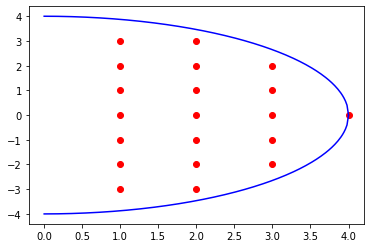

In [16]:
# making a momentum grid
dp = 1.0
pmax = 4
pmin = -pmax
np1 = round((pmax-pmin)/dp) + 1

ps_grid = np.zeros((np1**2,3))
pxs, pys = np.meshgrid(np.linspace(pmin,pmax,np1), np.linspace(pmin,pmax,np1))
ps_grid[:,0] = pxs.reshape(np1**2)
ps_grid[:,1] = pys.reshape(np1**2)
ps_grid[:,2] = np.zeros(np1**2)

kes_grid = np.zeros(np1**2)
kes_grid = np.sqrt(ps_grid[:,0]**2+ps_grid[:,1]**2+ps_grid[:,2]**2)

ps = []
kes = []

# imposing ke <= pmax, ke > 0, and p_x > 0
for i in range(len(kes_grid)):
    if kes_grid[i] < pmax+1e-5 and kes_grid[i] > 0 and ps_grid[i,0] >  0:
        ps.append(ps_grid[i])
        kes.append(kes_grid[i])

np2 = len(kes)
ps = np.array(ps)
kes = np.array(kes)

print(f'Number of momentum modes: {np2}')
print('Momentum modes:')
for i in range(np2):
    print(i, ps[i,:])


plt.scatter(ps[:,0], ps[:,1], color='r')
xs = np.linspace(0,pmax,200)
ys = np.sqrt(pmax**2 - xs**2)
plt.plot(xs, ys, color='b')
plt.plot(xs, -ys, color='b')
plt.show()
